In [6]:
import pandas as pd
import seaborn as sns

In [2]:
results_4mp = pd.read_csv("4mpresults.csv")
results_16mp = pd.read_csv("16mpresults.csv")

In [4]:
results = pd.concat([results_16mp, results_4mp])

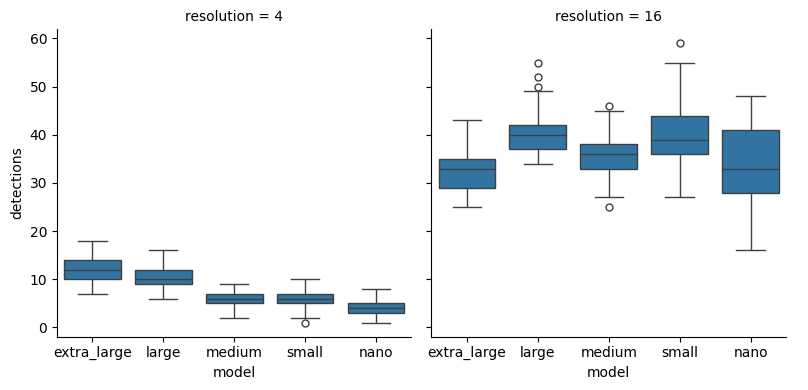

In [16]:
sns.catplot(data=results, kind='box', col='resolution', x='model', y='detections', height=4)

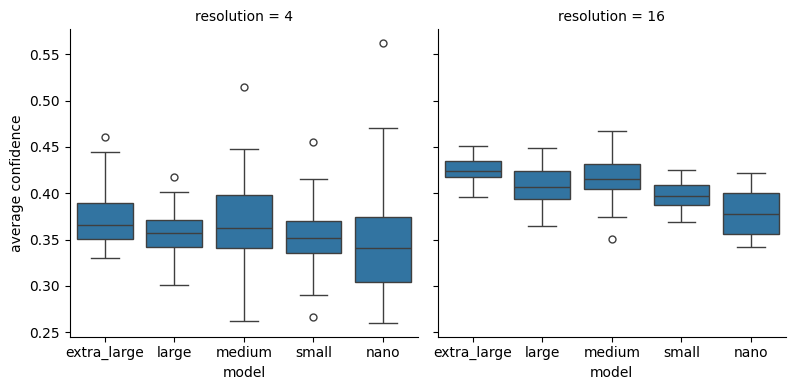

In [17]:
sns.catplot(data=results, kind='box', col='resolution', x='model', y='average confidence', height=4)

<Axes: title={'center': 'average confidence'}, xlabel='model'>

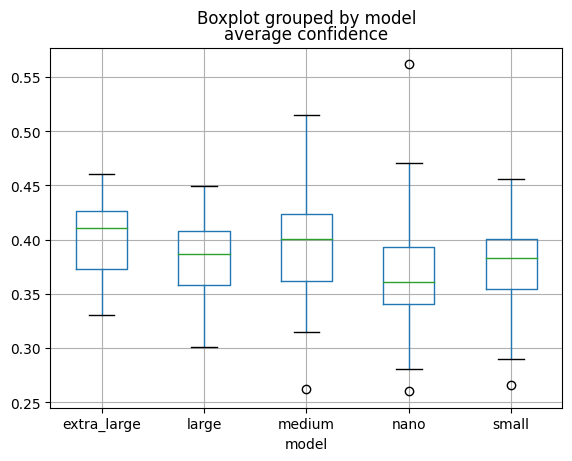

In [5]:
results.boxplot(column='average confidence', by='model')

array([<Axes: title={'center': '4'}>, <Axes: title={'center': '16'}>],
      dtype=object)

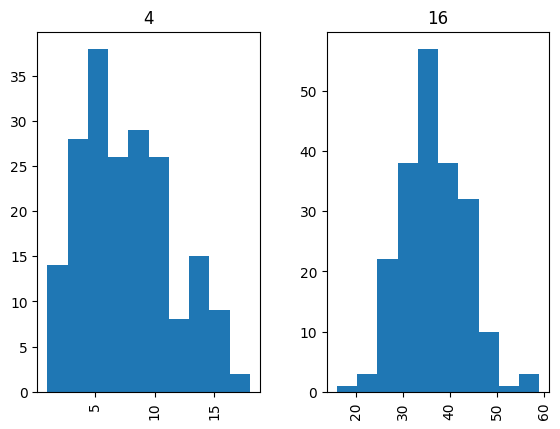

In [18]:
results.hist(column="detections", by="resolution")

array([<Axes: title={'center': '4'}>, <Axes: title={'center': '16'}>],
      dtype=object)

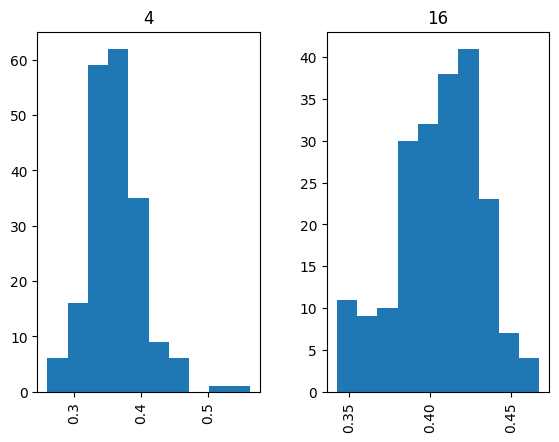

In [20]:
results.hist(column="average confidence", by="resolution")

# Some Statistical Tests

are these necessary? idk, but i learned this in my data classes so i might as well use it lol

In [22]:
from scipy import stats

## For each resolution, is there a difference between performance of the five YOLO models?

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
model = ols('detections ~ model', data = results_4mp).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
model,1867.056410,4.0,99.905315,1.237760e-45
Residual,887.692308,190.0,NaN,NaN


In [38]:
model = ols('detections ~ model', data = results_16mp).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
model,1992.029268,4.0,13.793166,5.944424e-10
Residual,7221.073171,200.0,NaN,NaN


Yes, there appears to be a statistically significant difference between results of each model

## Are the performances different between 4mp and 16mp images?

In [23]:
results_4mp['detections']

0      11
1      10
2       7
3       7
4       4
       ..
190    16
191    12
192     7
193     5
194     2
Name: detections, Length: 195, dtype: int64

In [27]:
stats.ttest_ind(results_4mp['detections'],results_16mp['detections'])

Ttest_indResult(statistic=-52.4501465570844, pvalue=7.426616113821988e-181)

In [28]:
stats.ttest_ind(results_4mp['average confidence'],results_16mp['average confidence'])

Ttest_indResult(statistic=-13.038694683725515, pvalue=1.3225899701502724e-32)

Yes, there appears to be a statistically significant difference between the results for each resolution